# prompt-delayed

### 1、与李老师生成的 ROOT 文件做交叉验证

In [1]:
TFile *ipfMe = new TFile("Gpd_100_109.root");
TTree *treeMe = (TTree*)ipfMe->Get("tree");
TFile *ipfLi = new TFile("pd100_109.root");
TTree *treeLi = (TTree*)ipfLi->Get("tree");
TCanvas* c1 = new TCanvas;

In [2]:
TH1D *pjeMe,*pjeLi;

#### delayed 投影谱：几乎相同

In [3]:
treeMe->Draw("ed>>pjeMe(1500,0,1500)","nd==1 && np==1");
pjeMe = (TH1D*)gROOT->FindObject("pjeMe");
pjeMe->SetLineColor(kBlue);

treeLi->Draw("dy>>pjeLi(1500,0,1500)");
pjeLi = (TH1D*)gROOT->FindObject("pjeLi");
pjeLi->SetLineColor(kRed);

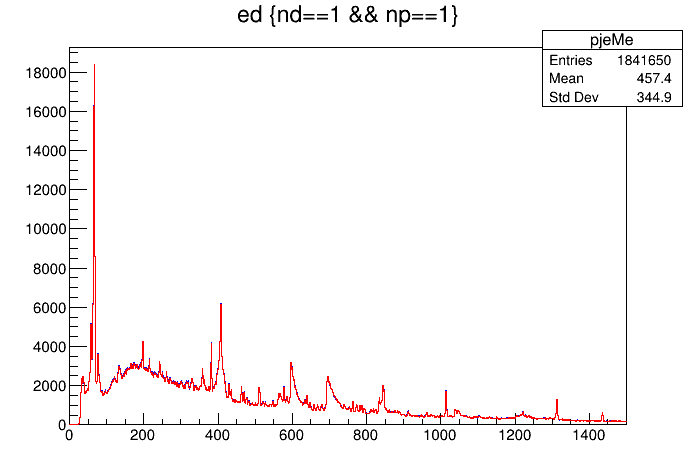

In [4]:
pjeMe->Draw();
pjeLi->Draw("same");
c1->Draw();

#### prompt 投影谱：有差异，原因未知

In [5]:
treeMe->Draw("epP>>pjeMe(1500,0,1500)","nd==1 && np==1");
pjeMe = (TH1D*)gROOT->FindObject("pjeMe");
pjeMe->SetLineColor(kBlue);

treeLi->Draw("px>>pjeLi(1500,0,1500)");
pjeLi = (TH1D*)gROOT->FindObject("pjeLi");
pjeLi->SetLineColor(kRed);

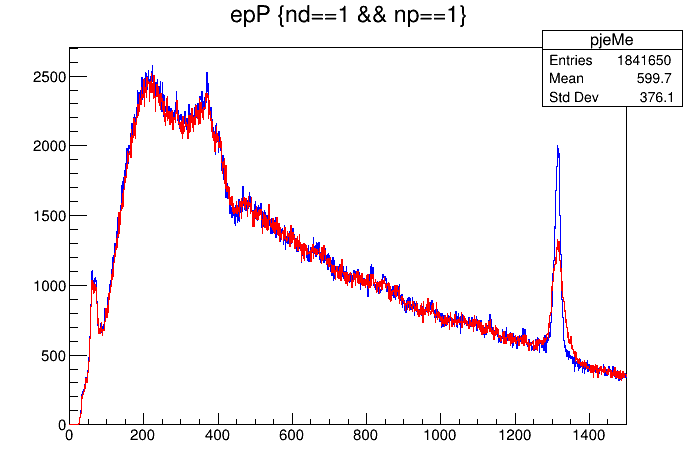

In [6]:
pjeMe->Draw();
pjeLi->Draw("same");
c1->Draw();

### 2、生成矩阵，检查本底

In [7]:
gROOT->ProcessLine(".x makeaggmat.C");

Generate gg matix to [Gpdmat.root] from [Gpd.root]


In [8]:
TFile* fmat = new TFile("Gpdmat.root");
TH2D* hgg = (TH2D*)fmat->Get("gg");
TH2D* hggmat = (TH2D*)fmat->Get("ggmat");
TH1D* hx = (TH1D*)fmat->Get("xTpj");
TH1D* hbx = (TH1D*)fmat->Get("xTpjBg");
TH1D* hpeakx = (TH1D*)fmat->Get("xTpjPeak");
TH1D* hy = (TH1D*)fmat->Get("yTpj");
TH1D* hby = (TH1D*)fmat->Get("yTpjBg");
TH1D* hpeaky = (TH1D*)fmat->Get("yTpjPeak");

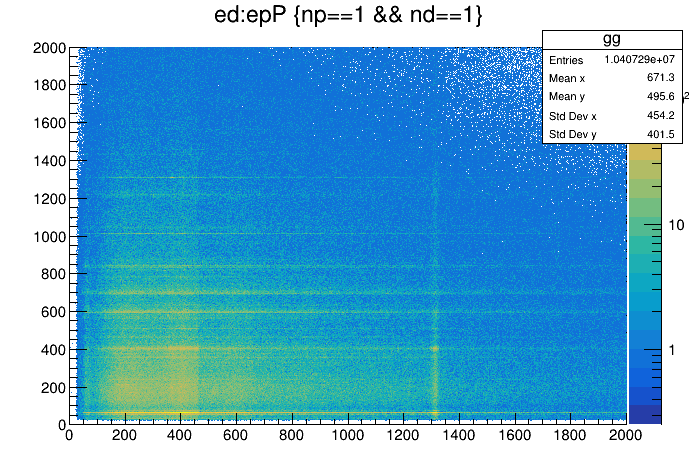

In [9]:
hgg->Draw("colz");
c1->SetLogz();
c1->Draw();

In [10]:
%jsroot on

#### prompt 投影谱

In [11]:
hx->Draw();
hbx->Draw("same");
hpeakx->Draw("same");
c1->Draw();

#### delayed 投影谱

In [12]:
hy->Draw();
hby->Draw("same");
hpeaky->Draw("same");
c1->Draw();

### 3、开窗（x:prompt  y:delayed）

In [13]:
gROOT->ProcessLine(".x agg.C");

load ROOT file: Gpdmat.root


通过观察投影谱确定开窗范围，而非减本底投影谱

349 keV 在投影谱上分辨较差；开窗能看到几条主要的 delayed gamma

In [14]:
newcanvas();
setpeakwidth(-5,5);
setnpeaks(10);
gx(349);

510 keV 在总投影谱上峰形不正常，开窗谱中只有 363 keV 比较明显，其他几条 delayed gamma 可以分辨

In [15]:
newcanvas();
setpeakwidth(-4,4);
setnpeaks(8);
gx(510);

363 keV 开窗只能看到 349,510 keV，峰形均很奇怪，可能是扣本底时破坏了峰形；349 keV 的宽度约 10 keV，与总投影谱上看到的一致

In [16]:
newcanvas();
setpeakwidth(-2,2);
setnpeaks(10);
gy(363);

818 keV 开窗：能看到349、510

In [17]:
newcanvas();
setpeakwidth(-2,2);
setnpeaks(10);
gy(818);

1048 keV 开窗：在投影谱上 1048 分辨较差；可以看到349，而510比较勉强

In [18]:
newcanvas();
setpeakwidth(-5,5);
setnpeaks(10);
gy(1048);

787 keV 开窗：可以看到349、510，但510的分辨似乎比其他开窗谱好，可能是扣本底扣出一个谷来

In [19]:
newcanvas();
setpeakwidth(-2,2);
setnpeaks(10);
gy(787);

340 keV：纲图和投影谱都显示其强度较弱，而开窗效果也较差，开窗谱中349、510峰的统计都较低

In [20]:
newcanvas();
setpeakwidth(-2,2);
setnpeaks(10);
gy(340);

### 确定 10+ isomer 的半衰期

In [21]:
TFile *ipf = new TFile("ROOT/Gpd.root");
TTree *tree = (TTree*)ipf->Get("tree");
TCut cut,cutb;
TH1D *td,*tdb;
TCanvas *c2 = new TCanvas;

In [22]:
//cut818 = "ed>=817 && ed<820";
//cutb818 = "(ed>=815 && ed<817) || (ed>=821 && ed<822)";
//cut787 = "ed>=786 && ed<790";
//cutb787 = "(ed>=778 && ed<780) || (ed>=790 && ed<791)";
//cut363 = "ed>=361 && ed<365";
//cutb363 = "(ed>=365 && ed<369)";

In [23]:
cut = "ed>=361 && ed<365";

In [24]:
tree->Draw("td>>td(100,0,1000)",cut);
td = (TH1D*)gROOT->FindObject("td");
c2->SetLogy();
c2->Draw();

在两侧开窗减去时间本底

In [25]:
cutb = "(ed>=365 && ed<369)";

In [26]:
tree->Draw("td>>tdb(100,0,1000)",cutb);
tdb = (TH1D*)gROOT->FindObject("tdb");
c2->SetLogy();
c2->Draw();

In [27]:
td->Add(td,tdb,1,-1);

In [28]:
TF1 *f1 = new TF1("f1","[0]*TMath::Exp(-[1]*x)",50,400);

In [29]:
f1->SetParameter(0,50);
f1->SetParameter(1,0.01);

In [30]:
td->Fit("f1","R");
td->Draw();
c2->SetLogy();
c2->Draw();

 FCN=263.696 FROM MIGRAD    STATUS=CONVERGED     137 CALLS         138 TOTAL
                     EDM=4.58574e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.14639e+03   5.32420e+01   2.04998e-01  -3.42722e-05
   2  p1           8.11712e-03   5.97051e-05   2.29906e-07   2.05787e+01


In [35]:
cout<<"10+ isomer halflife: "<<log(2)/f1->GetParameter(1)<<" ns";

10+ isomer halflife: 85.3933 ns